In [27]:
# encoding=utf8
import sys

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import itertools

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [10]:
tweet_list = pd.read_csv('Data/train.csv', dtype={'keyword':'str'})

In [66]:
stop_words = set(stopwords.words('english'))
tweets_clear_text = tweet_list.text.apply(lambda x: ' '.join([word for word in x.split() if (word.lower() not in (stop_words) and word.isalpha())]))

# validar sustantivo

sentence_words = tweets_clear_text.apply(lambda sentence: nltk.word_tokenize(sentence))

tokenized_words = list(itertools.chain.from_iterable(sentence_words))
                       
is_noun = lambda pos: pos[:2] == 'NN'
nouns = [word for (word, pos) in nltk.pos_tag(tokenized_words) if is_noun(pos)]


In [61]:
top_30_word_list = Counter(" ".join(nouns).split()).most_common(30)
piped_words = '|'.join([i[0] for i in top_30_word_list])
piped_words

'people|fire|New|California|time|RT|Full|buildings|disaster|Emergency|day|car|bomb|body|police|crash|way|emergency|Hiroshima|Northern|Obama|families|years|mass|News|Police|video|war|Fire|life'

In [62]:
top_30_noun_by_target = pd.DataFrame({'word': pd.Series([], dtype='str'), 'total_count': pd.Series([], dtype='int'), 'target_0': pd.Series([], dtype='int'), 'target_1': pd.Series([], dtype='int')})
top_30_noun_by_target.word = [x[0] for x in top_30_word_list]

for index, word in enumerate(top_30_noun_by_target.word):
    filtered_by_word = tweet_list[tweet_list.text.str.contains(word)]
    top_30_noun_by_target.total_count[index] = filtered_by_word.shape[0]
    top_30_noun_by_target.target_0[index] = filtered_by_word[filtered_by_word.target == 0].shape[0]
    top_30_noun_by_target.target_1[index] = filtered_by_word[filtered_by_word.target == 1].shape[0]

top_30_noun_by_target

,word,total_count,target_0,target_1
0,people,165.00,72.00,93.00
1,fire,383.00,99.00,284.00
2,New,321.00,123.00,198.00
3,California,120.00,6.00,114.00
4,time,165.00,114.00,51.00
5,RT,153.00,82.00,71.00
6,Full,81.00,71.00,10.00
7,buildings,96.00,30.00,66.00
8,disaster,109.00,32.00,77.00
9,Emergency,74.00,40.00,34.00


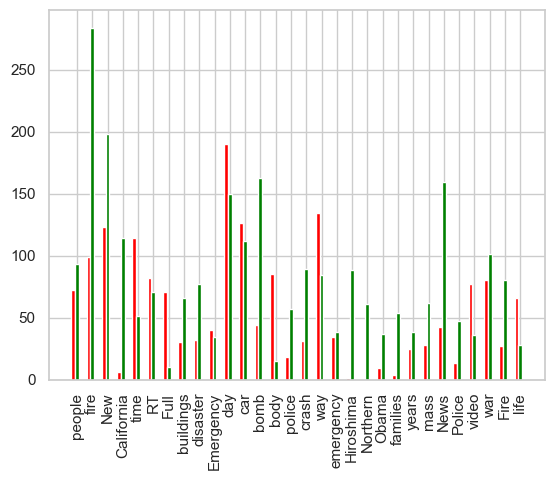

In [63]:
# bar graphs
fig, ax = plt.subplots()
x = np.arange(top_30_noun_by_target.shape[0])
width = 0.25

target_0 = top_30_noun_by_target.target_0.to_numpy();
target_1 = top_30_noun_by_target.target_1.to_numpy();

ax.bar(x, target_0, width, color='red')
ax.bar(x + width, target_1 , width, color='green')
ax.set_xticks(x + width)
ax.set_xticklabels(top_30_noun_by_target.word, rotation='vertical')
plt.show()

In [70]:
is_verb = lambda pos: pos[:2] == 'VB'
verbs = [word for (word, pos) in nltk.pos_tag(tokenized_words) if is_verb(pos)]

In [71]:
top_30_word_list = Counter(" ".join(verbs).split()).most_common(30)
piped_words = '|'.join([i[0] for i in top_30_word_list])
piped_words

'get|got|going|know|killed|go|burning|think|say|want|see|said|getting|make|bombing|take|found|says|liked|collided|come|hit|missing|came|love|made|went|coming|released|affected'

In [72]:
top_30_verb_by_target = pd.DataFrame({'word': pd.Series([], dtype='str'), 'total_count': pd.Series([], dtype='int'), 'target_0': pd.Series([], dtype='int'), 'target_1': pd.Series([], dtype='int')})
top_30_verb_by_target.word = [x[0] for x in top_30_word_list]

for index, word in enumerate(top_30_verb_by_target.word):
    filtered_by_word = tweet_list[tweet_list.text.str.contains(word)]
    top_30_verb_by_target.total_count[index] = filtered_by_word.shape[0]
    top_30_verb_by_target.target_0[index] = filtered_by_word[filtered_by_word.target == 0].shape[0]
    top_30_verb_by_target.target_1[index] = filtered_by_word[filtered_by_word.target == 1].shape[0]

top_30_verb_by_target

,word,total_count,target_0,target_1
0,get,309.00,217.00,92.00
1,got,130.00,95.00,35.00
2,going,94.00,68.00,26.00
3,know,125.00,90.00,35.00
4,killed,92.00,4.00,88.00
5,go,652.00,442.00,210.00
6,burning,91.00,40.00,51.00
7,think,93.00,73.00,20.00
8,say,133.00,74.00,59.00
9,want,105.00,85.00,20.00


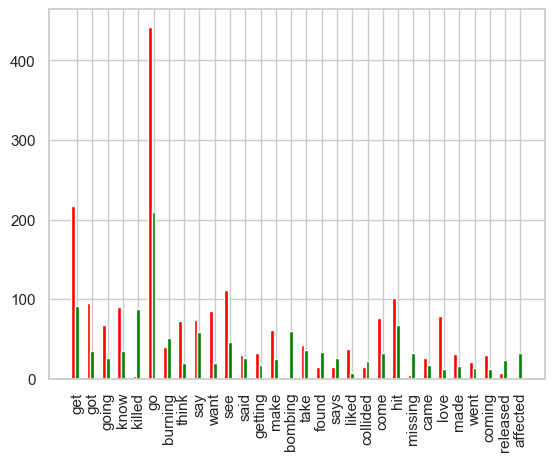

In [73]:
# bar graphs
fig, ax = plt.subplots()
x = np.arange(top_30_verb_by_target.shape[0])
width = 0.25

target_0 = top_30_verb_by_target.target_0.to_numpy();
target_1 = top_30_verb_by_target.target_1.to_numpy();

ax.bar(x, target_0, width, color='red')
ax.bar(x + width, target_1 , width, color='green')
ax.set_xticks(x + width)
ax.set_xticklabels(top_30_verb_by_target.word, rotation='vertical')
plt.show()

### Observacion
Los textos de tweets falsos contienen mas verbos. Ademas se puede inferir que las palabras con connotacion negativa (killed, missing, affected, bombing) tienden a estar relacionadas a tweets verdaderos mientras que las palabras con connotacion positiva (want, make, liked, love) tienden a estar relacionadas a tweets falsos